
## Modules


In [19]:
# Libraries
import pandas as pd
import missingno  as msno

## Data


### Description of data

Reviews Dataset:

- id - numerical index, the unique observation index for the given dataset
- rating (training set only) - categorical, business satisfaction rating: 1, 2, 3, 4, 5 (1: worse, 5: best)
- text - string, the review text itself
- business_id - string, unique business identifier
- user_id - string, unique customer identifier
- useful - integer, number of useful votes received
- funny - integer, number of funny votes received
- cool - integer, number of cool votes received
- date - string, date formatted YYYY-MM-DD

Businesses Dataset:

- business_id - string, unique business identifier
- name - string, the business's name
- address - string, the full address of the business
- city - string, the city
- state - string, 2 character state code, if applicable
- postal_code - string, the postal code
- latitude - float, latitude
- longitude - float, longitude
- attributes - object, business attributes to values. note: some attribute values might be objects
- categories - an array of strings of business categories
- hours - an object of key day to value hours, hours are using a 24hr clock

Customers Dataset:

- user_id - string, unique customer identifier
- name - string, the customer's first name
- ser_since - string, when the customer started rating businesses YYYY-MM-DD
- useful - integer, number of useful votes sent by the customer
- funny - integer, number of funny votes sent by the customer
- cool - integer, number of cool votes sent by the customer
- premium_account - array of integers, the years the customer had a premium account thanks to his involvement in writing reviews
- friends - integer, number of friends the customer has on the rating platform
- fans - integer, number of fans the customer has on the rating platform
- compliment_hot - integer, number of hot compliments received by the customer
- compliment_more - integer, number of more compliments received by the customer
- compliment_profile - integer, number of profile compliments received by the customer
- compliment_cute - integer, number of cute compliments received by the customer
- compliment_list - integer, number of list compliments received by the customer
- compliment_note - integer, number of note compliments received by the customer
- compliment_plain - integer, number of plain compliments received by the customer
- compliment_cool - integer, number of cool compliments received by the customer
- compliment_funny - integer, number of funny compliments received by the customer
- compliment_writer - integer, number of writer compliments received by the customer


In [4]:
# Import data
df_business = pd.read_parquet("data/ATML2024_businesses.parquet")

df_Train_reviews = pd.read_parquet("data/ATML2024_reviews_train.parquet")

df_users = pd.read_parquet("data/ATML2024_users.parquet")

In [23]:
# General information on the datasets
# USER DATASET
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747468 entries, 0 to 747467
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_id             747468 non-null  object
 1   user_name           747457 non-null  object
 2   user_since          747468 non-null  object
 3   useful_user         747468 non-null  int32 
 4   funny_user          747468 non-null  int32 
 5   cool_user           747468 non-null  int32 
 6   premium_account     57420 non-null   object
 7   friends             747468 non-null  int32 
 8   fans                747468 non-null  int32 
 9   compliment_hot      747468 non-null  int32 
 10  compliment_more     747468 non-null  int32 
 11  compliment_profile  747468 non-null  int32 
 12  compliment_cute     747468 non-null  int32 
 13  compliment_list     747468 non-null  int32 
 14  compliment_note     747468 non-null  int32 
 15  compliment_plain    747468 non-null  int32 
 16  co

In [6]:
print(df_Train_reviews.select_dtypes(include=["object", "category"]).columns.tolist())
df_users.head()

['user_id', 'business_id', 'text', 'date']


,user_id,name,user_since,useful,funny,cool,premium_account,friends,fans,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer
0,w7IdXgBVXKjZS5UYDO8cVq,Walker,2007-01-25 16:47:26,7217.0,1259.0,5994.0,2007,14995.0,267.0,250.0,65.0,55.0,56.0,18.0,232.0,844.0,467.0,467.0,239.0
1,gJrXd1wa1EZ2-_UoRgW41j,Daniel,2009-01-25 04:35:42,43091.0,13066.0,27281.0,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",4646.0,3138.0,1145.0,264.0,184.0,157.0,251.0,1847.0,7054.0,3131.0,3131.0,1521.0
2,gvz2VtPxToEXh0KFQYXnW2,Steph,2008-07-25 10:41:00,2086.0,1010.0,1003.0,"2009,2010,2011,2012,2013",381.0,52.0,89.0,13.0,10.0,17.0,3.0,66.0,96.0,119.0,119.0,35.0
3,AIdshsLNMm50o7qXSAeDZS,Gwen,2005-11-29 04:38:33,512.0,330.0,299.0,"2009,2010,2011",131.0,28.0,24.0,4.0,1.0,6.0,2.0,12.0,16.0,26.0,26.0,10.0
4,QGFh-RoJ4HscnnE-yMl5Ah,Karen,2007-01-05 19:40:59,29.0,15.0,7.0,None,27.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [22]:
df_users = df_users.apply(lambda x: x.astype(int) if x.dtype == 'float64' else x) # Convert float to int

In [7]:
# REVIEWS DATASET
df_Train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1050000 non-null  int64 
 1   user_id      1050000 non-null  object
 2   business_id  1050000 non-null  object
 3   rating       1050000 non-null  int64 
 4   useful       1050000 non-null  int64 
 5   funny        1050000 non-null  int64 
 6   cool         1050000 non-null  int64 
 7   text         1050000 non-null  object
 8   date         1050000 non-null  object
dtypes: int64(5), object(4)
memory usage: 72.1+ MB


In [8]:
# List of categorical variables
print(df_Train_reviews.select_dtypes(include=["object", "category"]).columns.tolist())
df_Train_reviews.head()

['user_id', 'business_id', 'text', 'date']


,id,user_id,business_id,rating,useful,funny,cool,text,date
0,0,gRWsscMiClFGIh2YUjNInT,Ab1ejQzv4eJRLgAlj7tzKT,5,1,0,0,"Sometimes you just want a cup of coffee, in a ...",2013-12-22 23:45:01
1,1,Q3RXWVFtLo4I7MC85ELPh7,QkRhOowLAGVZC5gn4RLkjH,5,1,0,0,Mr. Clyde stopped at our house and asked us if...,2020-02-11 01:00:32
2,2,AD2z6qhmVcRJkywa1KsEFG,ADWVkizi8gKjj07mn8NiMe,4,0,0,0,One of my favorite places to grab a quick bit ...,2014-05-28 19:05:26
3,3,A8HQot2boCpoPIThfHV5iy,wkk30dWY49cSiDU3FKg8FH,5,0,1,0,"Wow, this place is huge! Life size aquarium an...",2014-01-20 23:42:44
4,4,Q7UzjD01YnimUOsvAEQ7JK,wUjnssL0bJIEqdqJs8M0GV,5,0,0,0,I ordered 3 large pizzas and wings for my fam...,2020-01-29 00:20:34


In [9]:
# BUSINESS DATASET
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138210 entries, 0 to 138209
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   business_id  138210 non-null  object 
 1   name         138210 non-null  object 
 2   address      133772 non-null  object 
 3   city         138210 non-null  object 
 4   state        138210 non-null  object 
 5   postal_code  138145 non-null  object 
 6   latitude     138210 non-null  float64
 7   longitude    138210 non-null  float64
 8   attributes   126589 non-null  object 
 9   categories   138136 non-null  object 
 10  hours        117852 non-null  object 
dtypes: float64(2), object(9)
memory usage: 11.6+ MB


In [10]:
# List of categorical variables
print(df_Train_reviews.select_dtypes(include=["object", "category"]).columns.tolist())
df_business.head()

['user_id', 'business_id', 'text', 'date']


,business_id,name,address,city,state,postal_code,latitude,longitude,attributes,categories,hours
0,wPYArZCy3AETdTjB-x3fpm,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
1,QQNIWVsnAT_iKiKriWrFUt,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
2,wm9eoqjytVbC7dQcM4WSTM,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
3,AfVDXGIKBUE0EdTw_6cMWm,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
4,QjvanH64QUduo6E-8F33FC,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."


## EDA

### Checking for missing values


<Axes: >

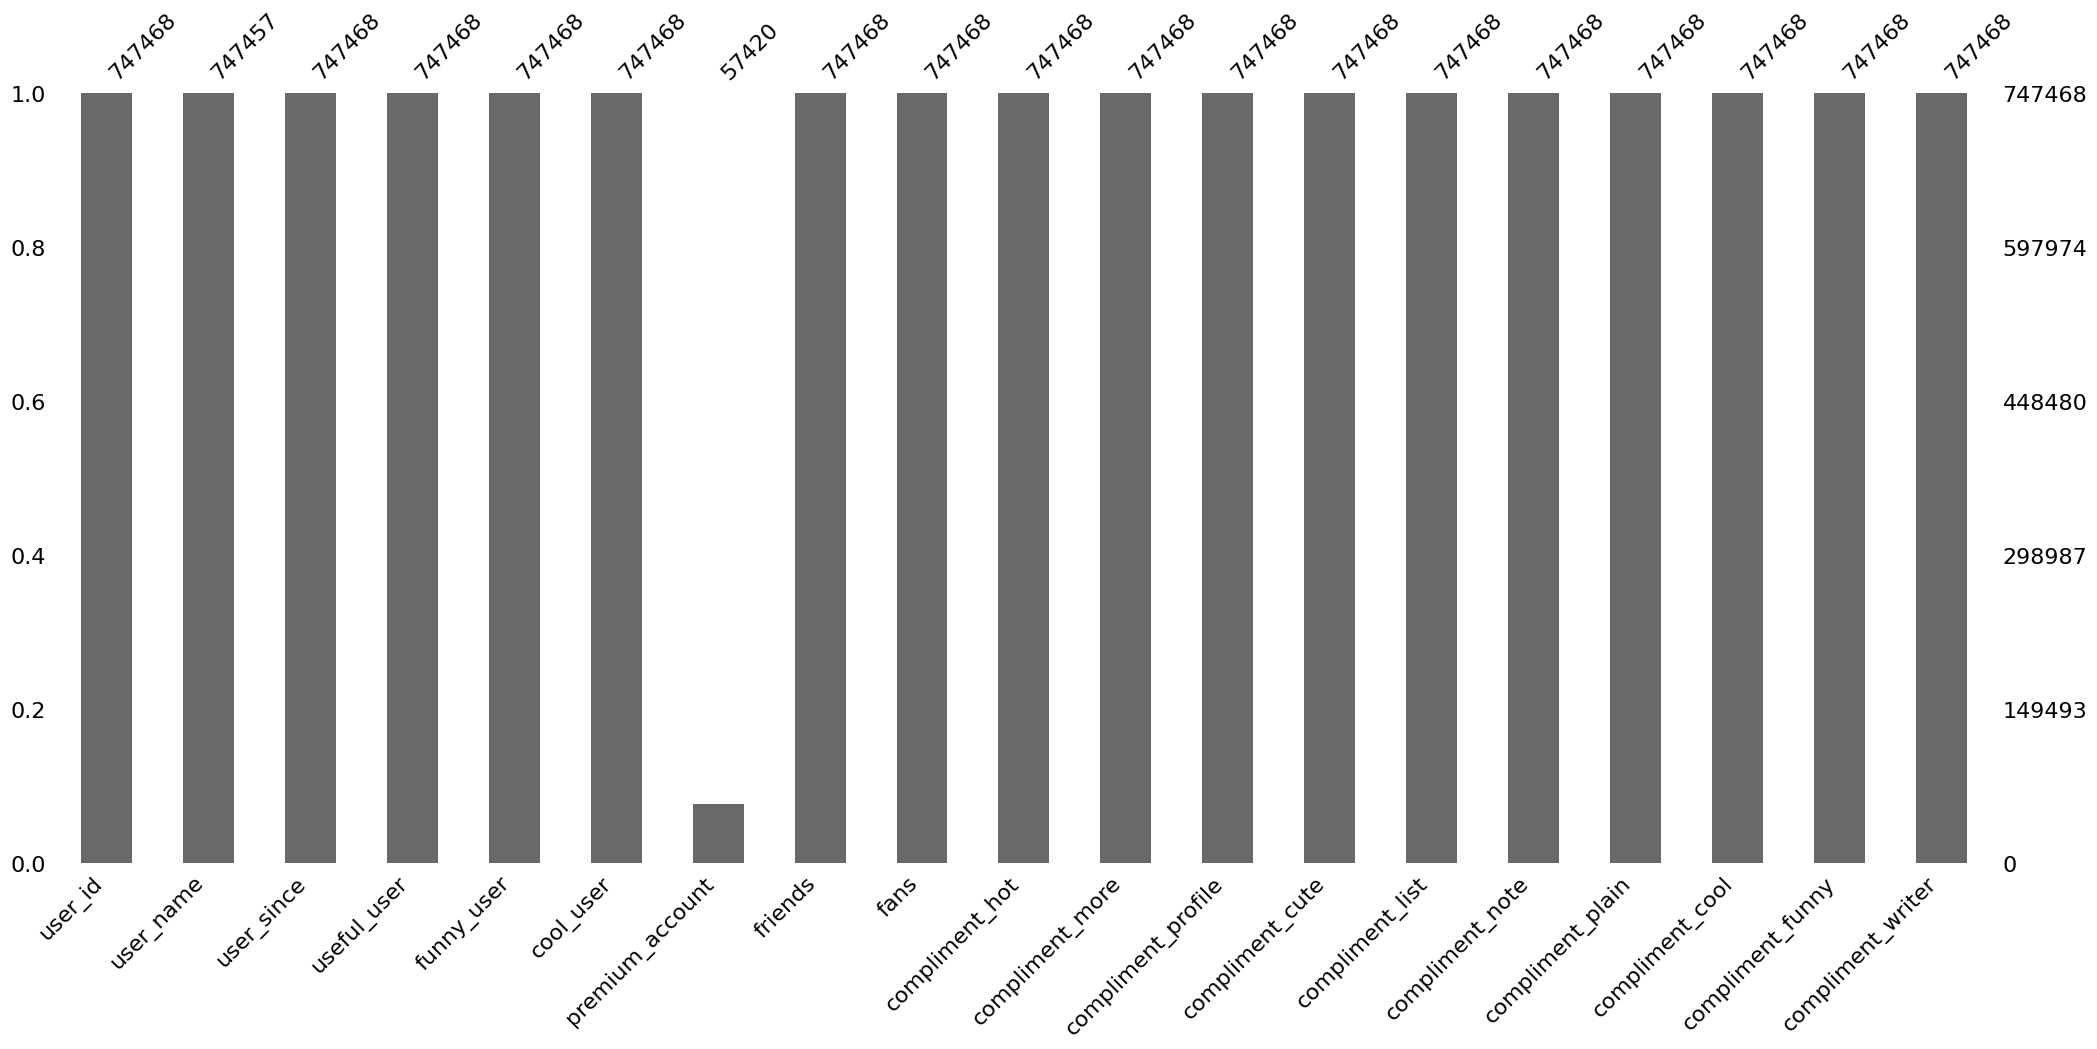

In [25]:
msno.bar(df_users)

There is a vast majority of missing values for the variable premium_account, so we will discard it.

In [26]:
del df_users["premium_account"]

<Axes: >

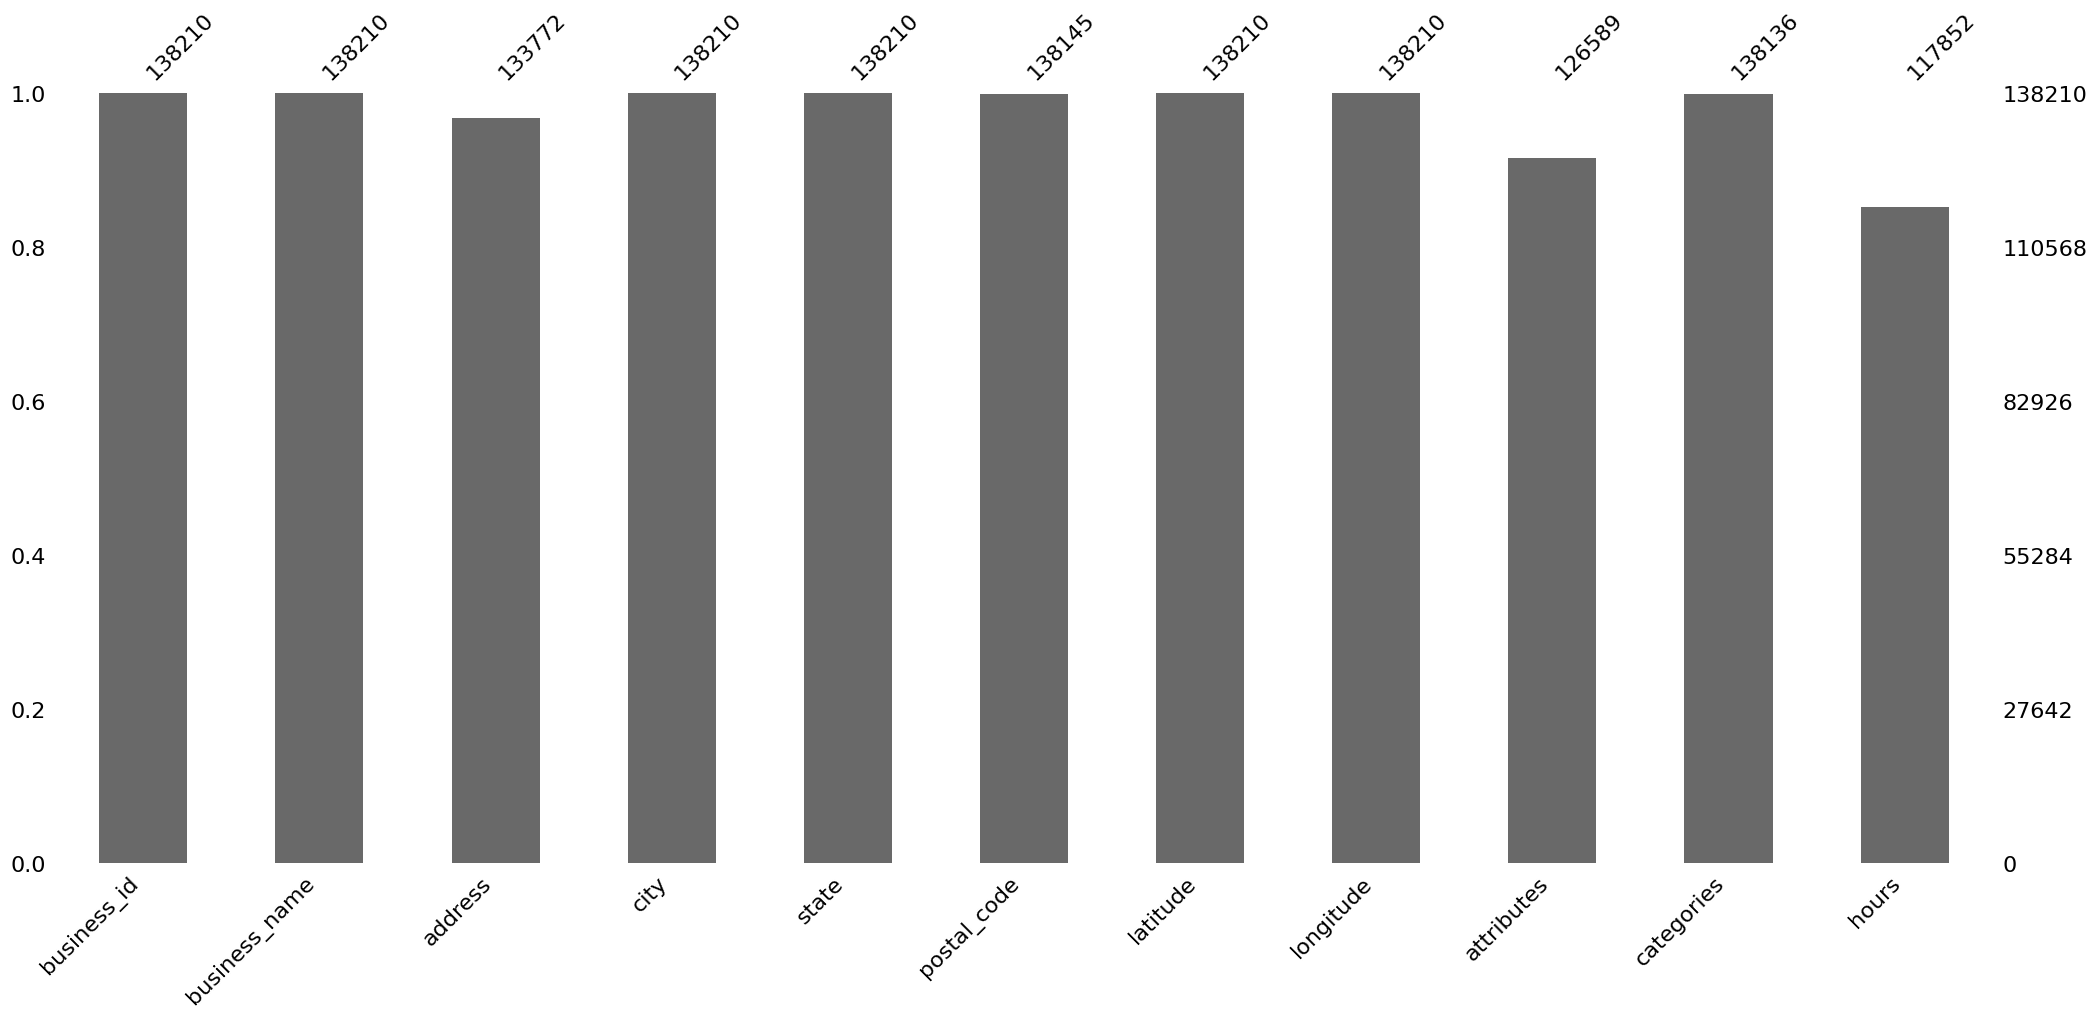

In [30]:
msno.bar(df_business)

<Axes: >

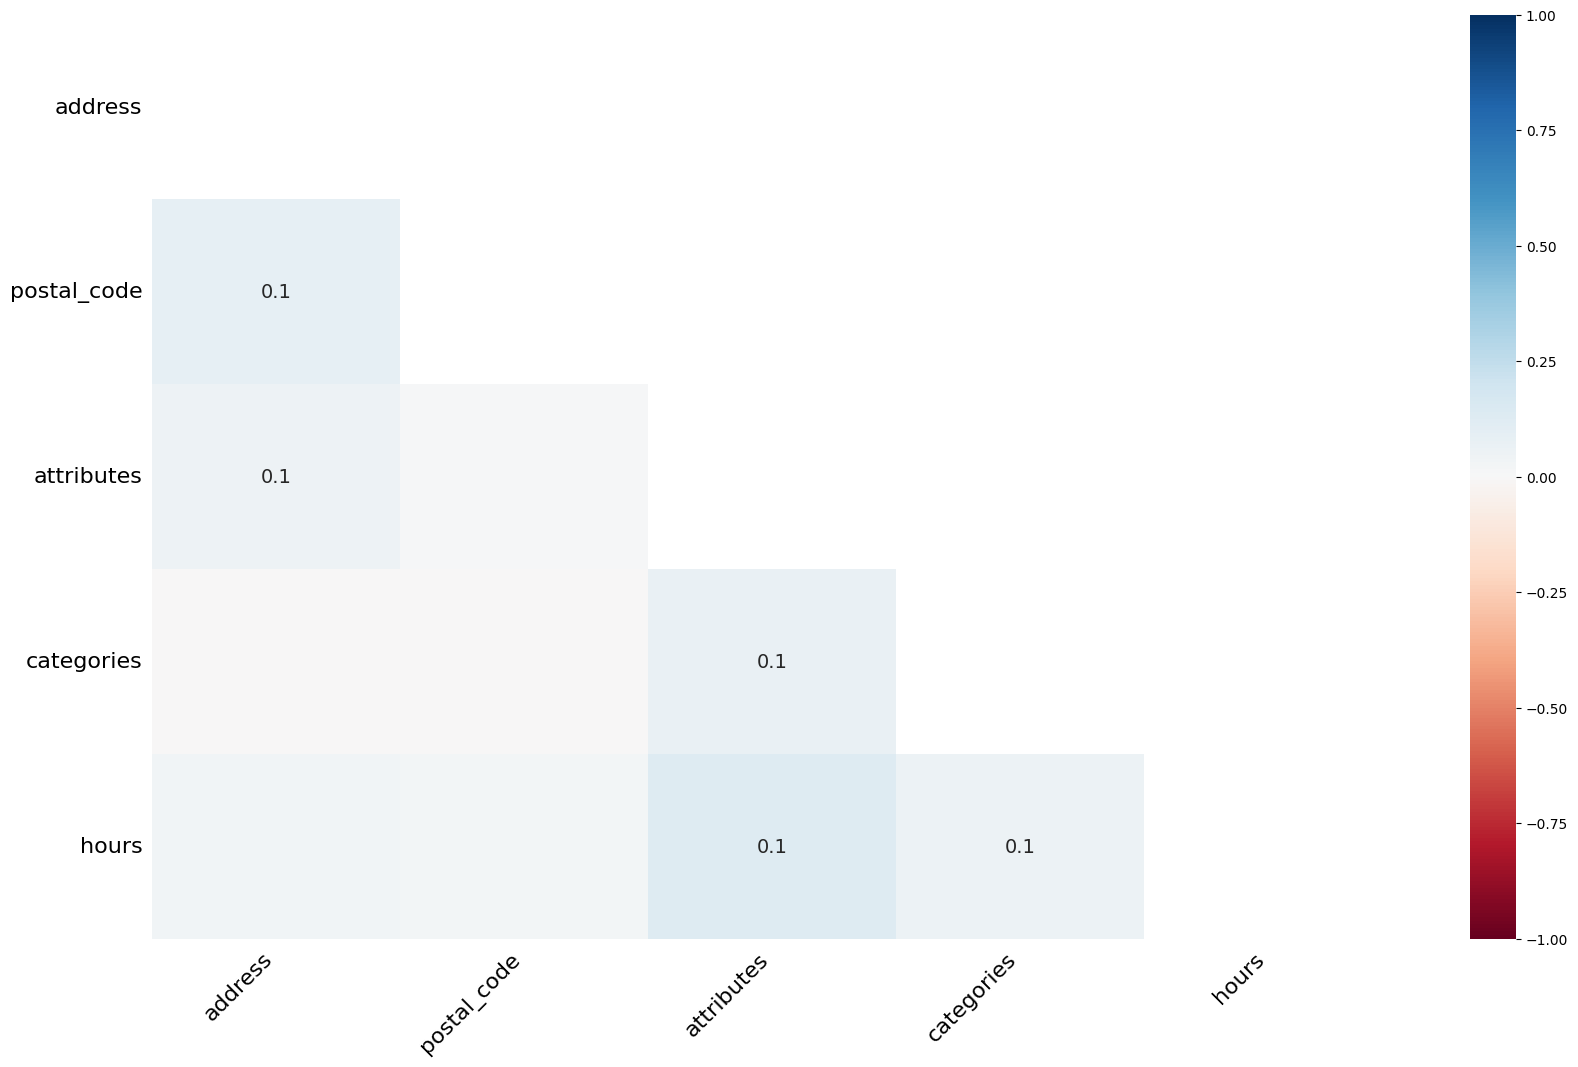

In [31]:
msno.heatmap(df_business)

There are uncorellated missing values for the variables address, postal_code, attributes, and categories. However, not that many are missing as we can see from the barplots. 

<Axes: >

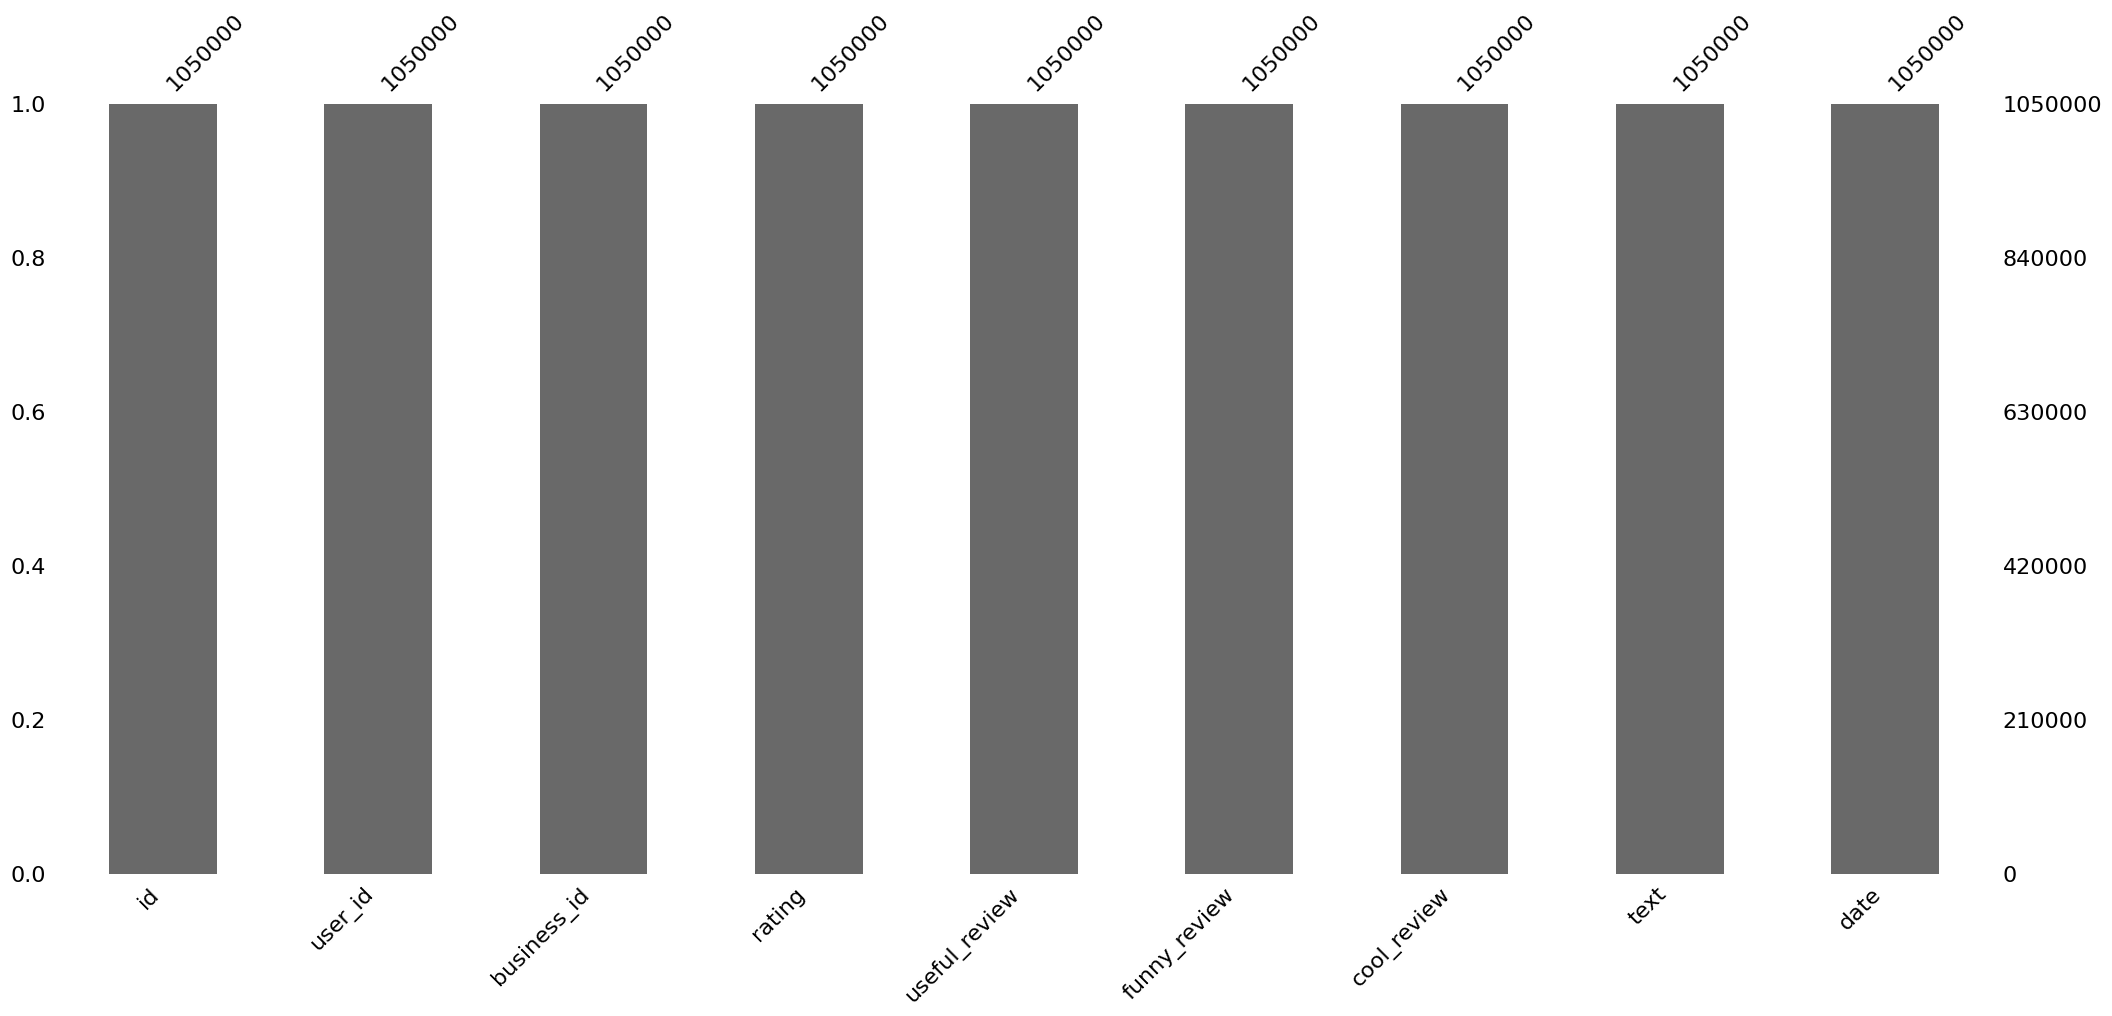

In [32]:
msno.bar(df_Train_reviews)

No missing values for this dataset

In [11]:


# Identify the unique values in each dataset
## Business dataset
print("\nBusiness: Description\n", df_business.describe())
print("\nBusiness: Unique values\n", df_business.nunique())
## Reviews dataset
print("\nTrain reviews: Description\n", df_Train_reviews.describe())
print("\nTrain reviews: Unique values\n", df_Train_reviews.nunique)
## Users dataset
print("\nUser dataset: Description\n", df_users.describe())
print("\nUser dataset: Unique \n", df_users.nunique())

# Categorical variables exploration
# Numerical variables exploration
# Numerical variables exploration


Business dataset: 
 business_id        0
name               0
address         4438
city               0
state              0
postal_code       65
latitude           0
longitude          0
attributes     11621
categories        74
hours          20358
dtype: int64

Train reviews dataset: 
 id             0
user_id        0
business_id    0
rating         0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Users dataset: 
 user_id                    0
name                      11
user_since                 0
useful                     0
funny                      0
cool                       0
premium_account       690048
friends                    0
fans                       0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cute            0
compliment_list            0
compliment_note            0
compliment_plain           0
compliment_cool            0
compliment_funny           0
com

### Transform data

Ideas:

- Log when data is highly skewed.
- Binning of continuous variables.
- Simplifying of categories: Trying to aggregate to higher-level categories when it makes sense.


# Exploratory Data Analysis


## 1. Exploring individual variable


Quantify:

- _Location_:
  - mean
  - median
  - mode
  - interquartile mean
- _Spread_:
  - standard deviation
  - variance
  - range
  - interquartile range
- _Shape_:
  - skewness
  - kurtosis

For time series:
plot summary statistics over time.

For panel data:

- Plot cross-sectional summary statistics over time
- Plot time-series statistics across the population

#### Question

- What does each field in the data look like?
  - Is the distribution skewed? Bimodal?
  - Are there outliers? Are they feasible?
  - Are there discontinuities?
- Are the typical assumptions seen in modeling valid?
  - Gaussian
  - Identically and independently distributed
  - Have one mode
  - Can be negative
  - Generating processes are stationary and isoptropic (time series)
  - Independence between subjects (panel data)


## 2. Exploring the relationship between each variable and the target


How does each field interact with the target?

Assess each relationship’s:

- Linearity
- Direction
- Rough size
- Strength
  Methods:
- Bivariate visualizations
- Calculate correlation


## 3. Assessing interactions between variables


- Bivariate visualizations
- Correlation matrices
- Compare summary statistics of variable x for different categories of y


## 4. Exploring data across many dimensions


- Categorical:
  - Parallel coordinates
- Continuous
  - Principal component analysis
  - Clustering


# Feature Engineering


In [12]:
# Removal of informationlesss variables

# Basic preprocessing


In [13]:
# Assessing columns with the same name
print(
    f"Column(s) name(s) present in user and business: {set(df_users.columns).intersection(set(df_business.columns))}"
)
print(
    f"Column(s) name(s) present in user and reviews: {set(df_users.columns).intersection(set(df_Train_reviews.columns))}"
)
print(
    f"Column(s) name(s) present in business and reviews: {set(df_business.columns).intersection(set(df_Train_reviews.columns))}"
)

Column(s) name(s) present in user and business: {'name'}
Column(s) name(s) present in user and reviews: {'useful', 'funny', 'user_id', 'cool'}
Column(s) name(s) present in business and reviews: {'business_id'}


In [14]:
df_users.rename(
    columns={
        "name": "user_name",
        "useful": "useful_user",
        "funny": "funny_user",
        "cool": "cool_user",
    },
    inplace=True,
)
df_business.rename(columns={"name": "business_name"}, inplace=True)
df_Train_reviews.rename(
    columns={"useful": "useful_review", "funny": "funny_review", "cool": "cool_review"},
    inplace=True,
)

In [15]:
# Assessing the number of obersevations that will be lost if we merge the datasets
print(
    f"Number of user ids not in the reviews dataset: {len(set(df_users.user_id).difference(set(df_Train_reviews.user_id)))}"
)
print(
    f"Number of user ids not in the user dataset: {len(set(df_Train_reviews.user_id).difference(set(df_users.user_id)))}"
)
print(
    f"Number of business ids not in the reviews dataset: {len(set(df_business.business_id).difference(set(df_Train_reviews.business_id)))}"
)
print(
    f"Number of business ids not in the business dataset: {len(set(df_Train_reviews.business_id).difference(set(df_business.business_id)))}"
)

Number of user ids not in the reviews dataset: 168432
Number of user ids not in the user dataset: 7
Number of business ids not in the reviews dataset: 9803
Number of business ids not in the business dataset: 0


In [16]:
# Merge the datasets
merged_reviews = pd.merge(
    pd.merge(df_Train_reviews, df_users, on="user_id", how="inner"),
    df_business,
    on="business_id",
    how="inner",
)
# Remove the columns that are not useful
merged_reviews.drop(columns=["id", "user_id", "business_id"], inplace=True)
merged_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049993 entries, 0 to 1049992
Data columns (total 34 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   rating              1049993 non-null  int64  
 1   useful_review       1049993 non-null  int64  
 2   funny_review        1049993 non-null  int64  
 3   cool_review         1049993 non-null  int64  
 4   text                1049993 non-null  object 
 5   date                1049993 non-null  object 
 6   user_name           1049981 non-null  object 
 7   user_since          1049993 non-null  object 
 8   useful_user         1049993 non-null  float64
 9   funny_user          1049993 non-null  float64
 10  cool_user           1049993 non-null  float64
 11  premium_account     258797 non-null   object 
 12  friends             1049993 non-null  float64
 13  fans                1049993 non-null  float64
 14  compliment_hot      1049993 non-null  float64
 15  compliment_more

In [17]:
print(
    f"Loss of observations: {len(df_Train_reviews) - len(merged_reviews)} obersevations"
)  # user_ids that were not in the user dataset

Loss of observations: 7 obersevations


In [18]:
merged_reviews

,rating,useful_review,funny_review,cool_review,text,date,user_name,user_since,useful_user,funny_user,...,business_name,address,city,state,postal_code,latitude,longitude,attributes,categories,hours
0,5,1,0,0,"Sometimes you just want a cup of coffee, in a ...",2013-12-22 23:45:01,Adam,2013-12-22 23:42:29,2.0,1.0,...,Portland Brew,2605 12th Ave S,Nashville,TN,37204,36.123680,-86.790149,"{'WiFi': ""'free'"", 'OutdoorSeating': 'True', '...","Sandwiches, Coffee & Tea, Bagels, Food, Restau...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
1,5,1,0,0,Mr. Clyde stopped at our house and asked us if...,2020-02-11 01:00:32,Christine,2019-10-15 13:14:25,5.0,0.0,...,Clyde & Son's Tree Service,5802 E 34th St,Tucson,AZ,85711,32.194106,-110.868540,None,"Home Services, Tree Services","{'Monday': '7:0-16:30', 'Tuesday': '7:0-16:30'..."
2,4,0,0,0,One of my favorite places to grab a quick bit ...,2014-05-28 19:05:26,Jacqueline,2013-11-27 01:55:41,146.0,54.0,...,Chickie's & Pete's,1526 Packer Ave,Philadelphia,PA,19145,39.911417,-75.174511,"{'GoodForKids': 'True', 'Corkage': 'False', 'H...","Seafood, Nightlife, Sports Bars, Bars, Restaur...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
3,5,0,1,0,"Wow, this place is huge! Life size aquarium an...",2014-01-20 23:42:44,Dennis,2009-11-22 18:17:20,53.0,22.0,...,Scheels,1200 Scheels Dr,Sparks,NV,89434,39.531051,-119.721751,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Outdoor Gear, Fashion, Men's Clothing, Women's...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-21:0', ..."
4,5,0,0,0,I ordered 3 large pizzas and wings for my fam...,2020-01-29 00:20:34,LeeAnn,2020-01-29 00:14:20,0.0,0.0,...,Pizza 54,16138 FL-54,Odessa,FL,33556,28.187041,-82.548173,"{'HasTV': 'True', 'RestaurantsTableService': '...","Restaurants, Pizza, Salad, Chicken Wings","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049988,5,0,0,0,"QT is like the Bentley of gas stations, you're...",2018-05-04 06:55:33,April,2013-01-11 22:10:15,9.0,7.0,...,QuikTrip,12200 Dorsett Rd,Maryland Heights,MO,63043,38.713844,-90.443519,"{'BusinessParking': ""{'garage': False, 'street...","Convenience Stores, Automotive, Restaurants, F...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1049989,4,1,0,1,"The Salmon Dumplings, oh the Salmon Dumplings!...",2015-07-10 04:03:02,Huiwen,2015-05-15 03:01:12,15.0,1.0,...,Seiko Japanese Restaurant,604 N 2nd St,Philadelphia,PA,19123,39.961212,-75.141571,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Restaurants, Japanese, Watches, Sushi Bars, Sh...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
1049990,5,3,0,1,"So for those who don't know my reviews, I post...",2019-11-10 20:45:30,Nikki,2018-11-08 01:02:28,5.0,3.0,...,a.bar,1737 Walnut St,Philadelphia,PA,19103,39.950271,-75.170514,"{'NoiseLevel': ""u'average'"", 'RestaurantsAttir...","Bars, Tapas Bars, Restaurants, American (Tradi...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
1049991,4,0,0,0,Fratelli's is a great local Italian spot. When...,2016-10-30 17:36:49,Sumiko,2015-02-24 18:56:50,25.0,1.0,...,Fratelli's Italian Restaurant,1414 Rt 130 N,Burlington,NJ,08016,40.087250,-74.827738,"{'HasTV': 'True', 'RestaurantsGoodForGroups': ...","Italian, Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


# Models


# Models Comparison & Best Model Assessment
